# `03-analysis`
In this notebook, we showcase the analysis techniques of the data.
Specifically, we show the different methods used to calculate breathing rate.

## Preliminaries
Imports

In [1]:
import scipy as sp
import pathlib
import pickle
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 600

import src.signals.breathing_rate as br

Define paths (based on the Cookiecutter file structure)

In [2]:
PATH_DATA = pathlib.Path('../data/processed')

## Read data
In this notebook, we will visualize one NN segment from one single participant
for demo purposes. We chose this as an example since it is a relatively
clean signal. However, feel free to experiment with data from different
participants and different segments! This should give you an idea of
the variability between the signals and how they affect the performance
of the different methods.

The script `calculate_breathing_rate` (`calculate_breathing_rate` in 
the `Makefile`) processes the whole dataset.

In [3]:
participant_id = 'f2y10'
with open(str(PATH_DATA/(participant_id + '.pkl')), 'rb') as f:
    dataset = pickle.load(f)

nn = dataset['nn_interp_y_trimmed_3'][30]
fs = 1/dataset['T_int']  # Remember that the NN signal was interpolated with interval T_int.

## Calculate breathing rate
We will store the computeed breathing rates in a dictionary

In [4]:
breathing_rate = {}

### Spectral analysis
#### Fourier analysis (`Spec-FT`)

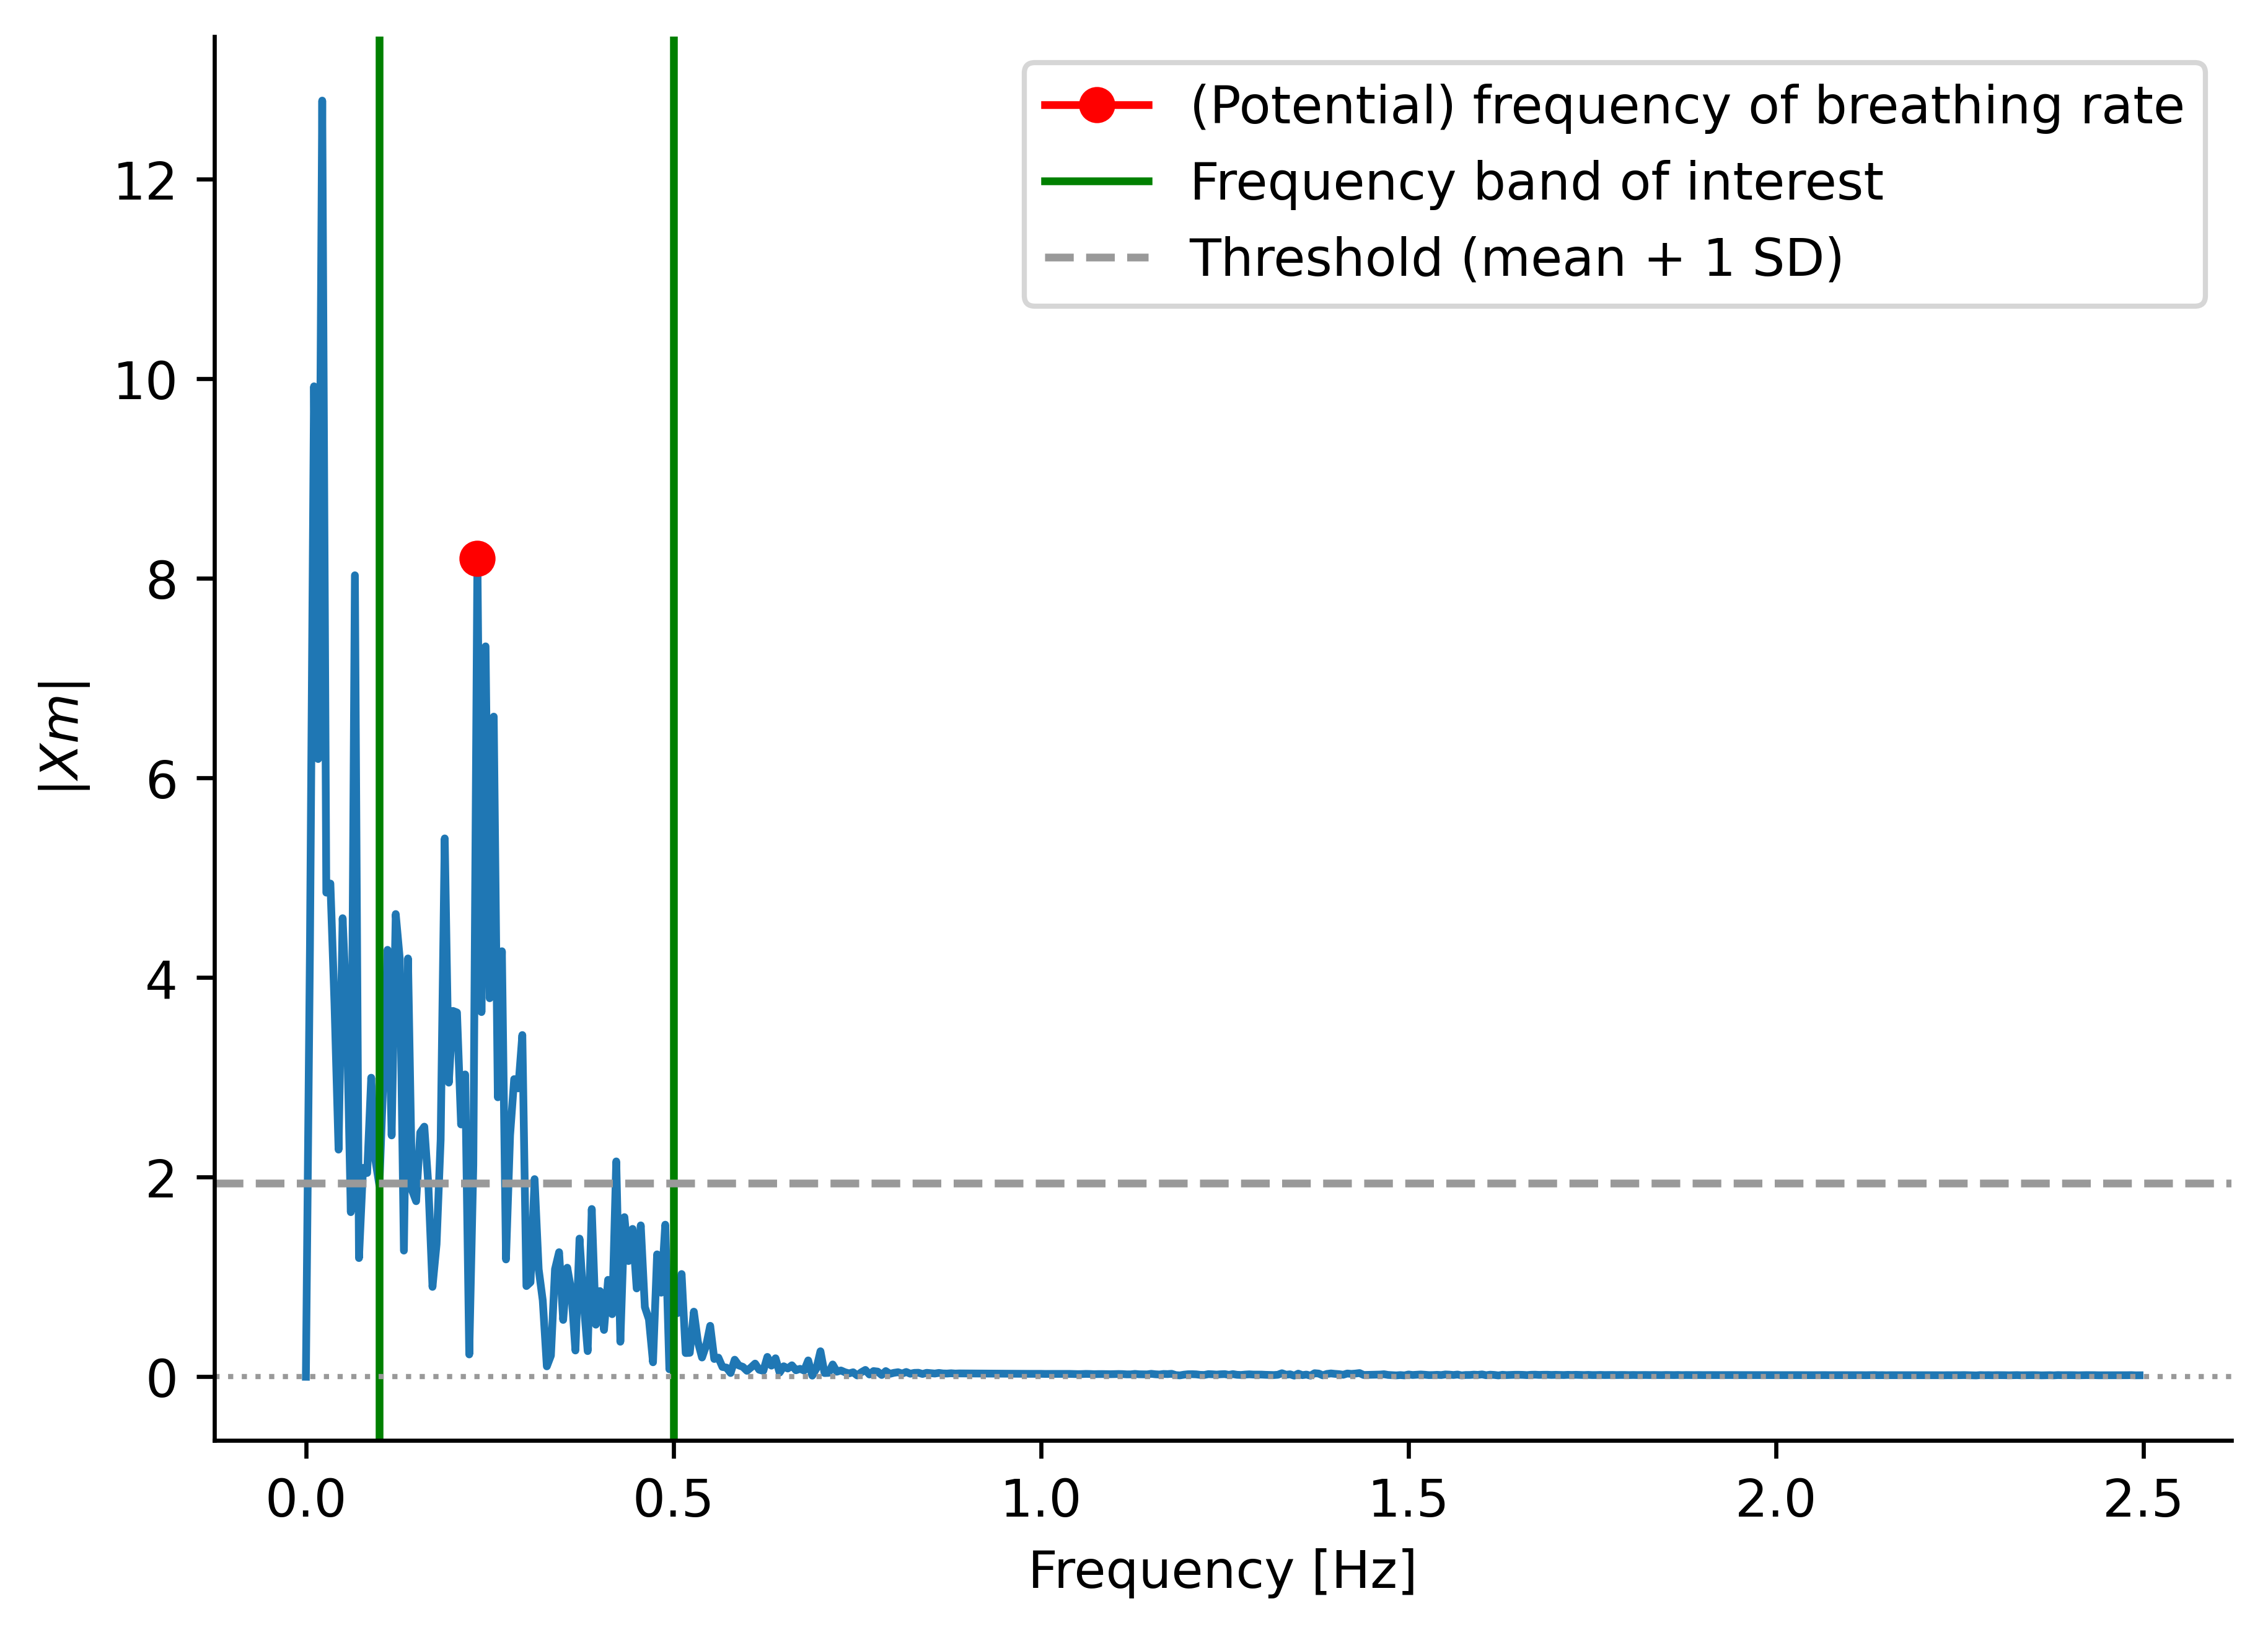

0.23333333333333334

In [5]:
breathing_rate['spec_ft'], fix, ax = br.spec_ft(nn, fs, f_low=0.1, f_high=0.5, visualizations=True)
breathing_rate['spec_ft']

#### Autoregressive modelling (`Spec-AR`)

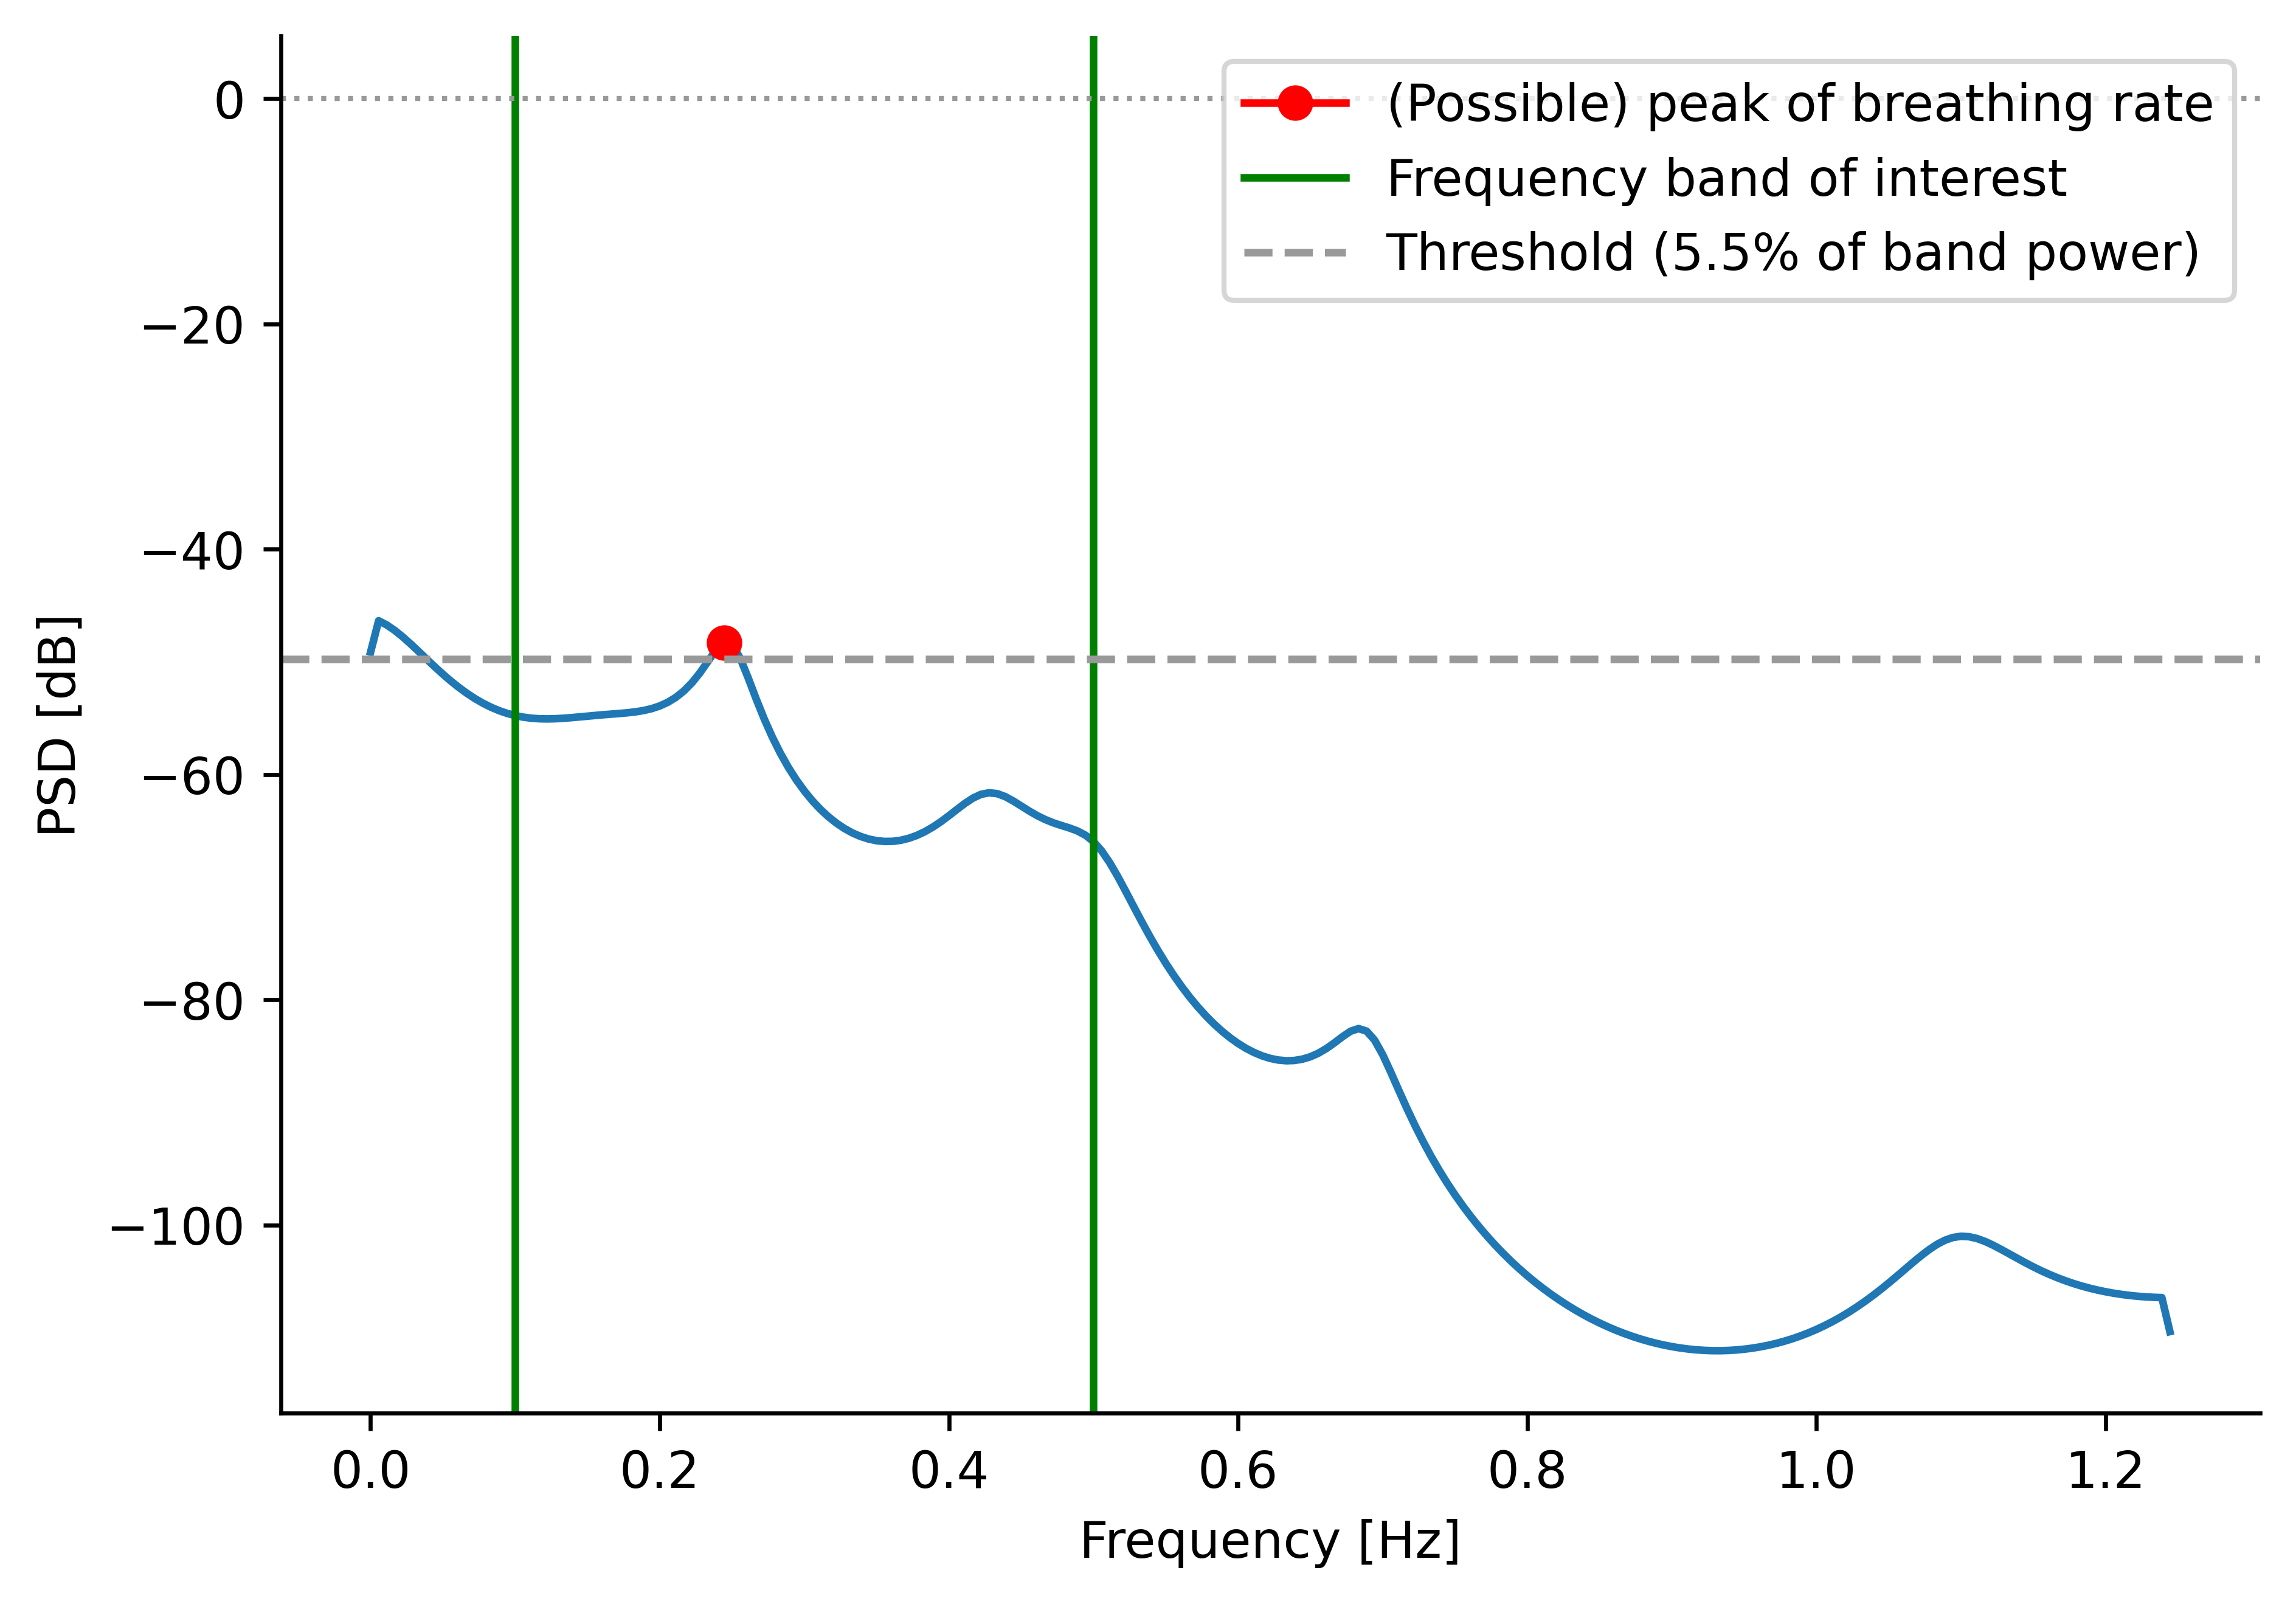

0.24444444444444446

In [6]:
breathing_rate['spec_ar'], fig, ax = br.spec_ar(nn, fs, f_low=0.1, f_high=0.5, visualizations=True)
breathing_rate['spec_ar']

### Autocorrelation function
#### Autocorrelation maximum method (`ACF-max`)

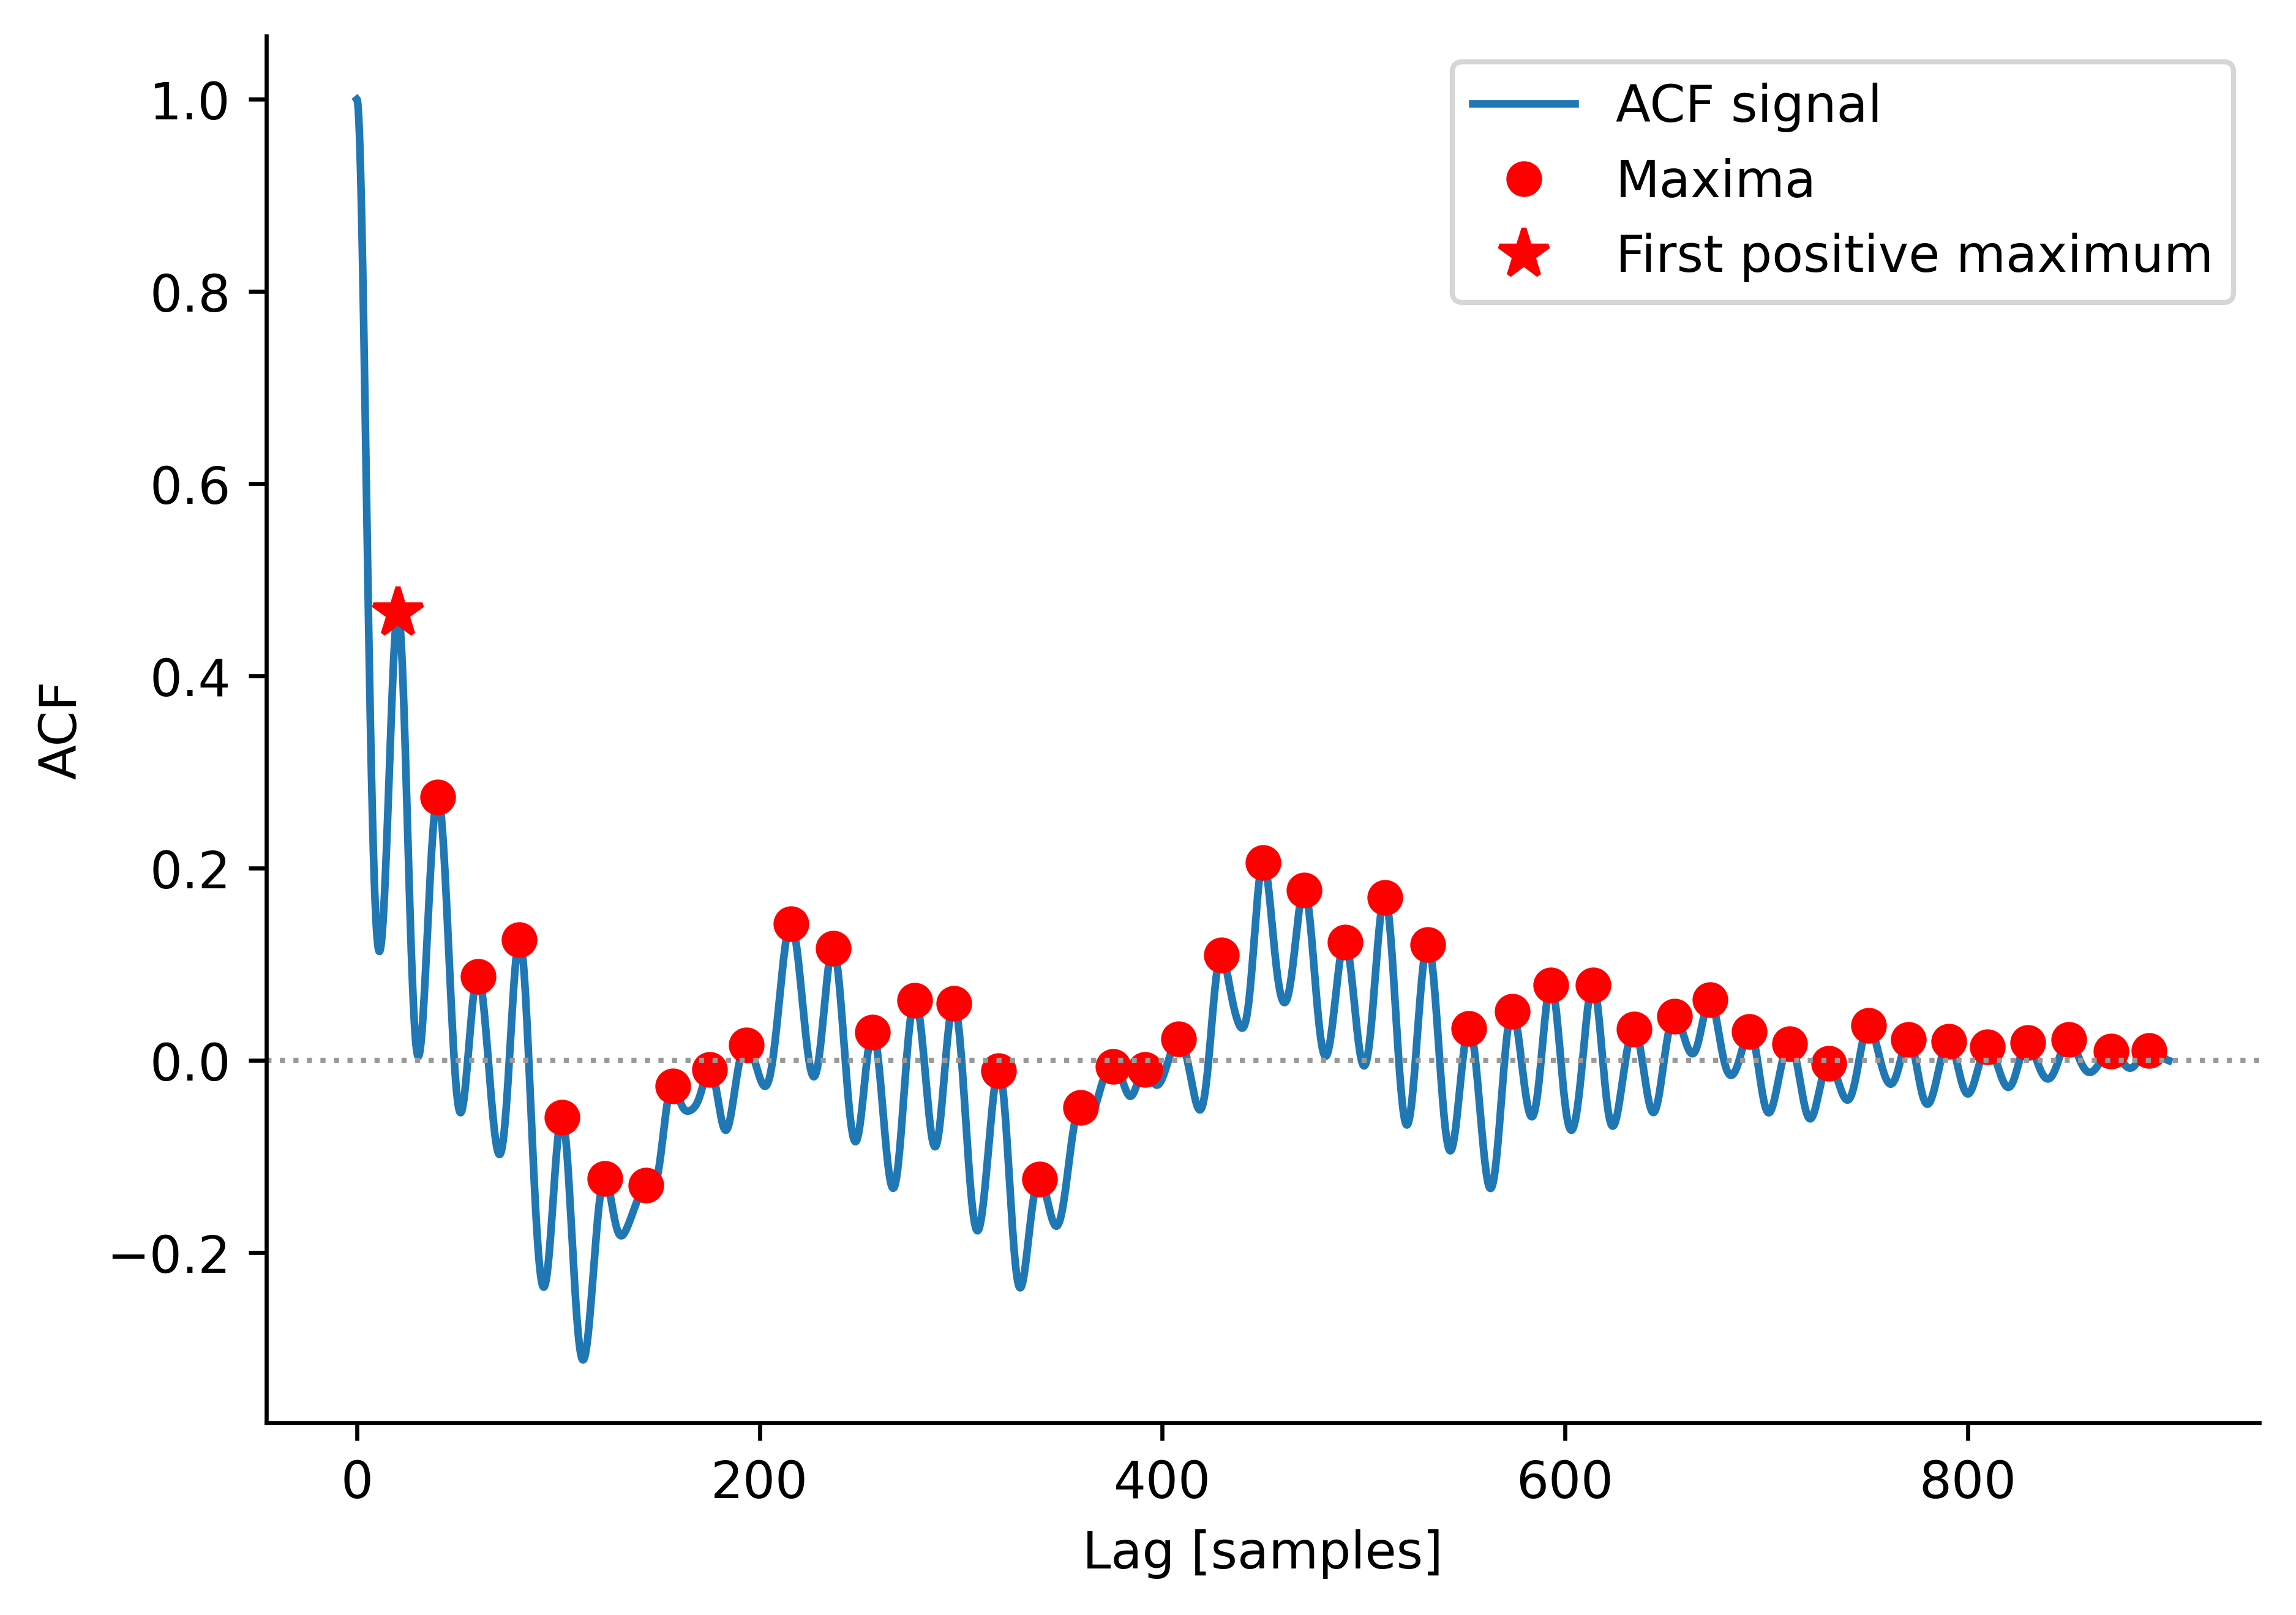

0.24509803921568626

In [7]:
breathing_rate['acf_max'], fig, ax = br.acf_max(nn, fs, f_low=0.1, f_high=0.5, visualizations=True)
breathing_rate['acf_max']

#### Autocorrelation advanced method (`ACF-adv`)

d:\users\artur\documents\projects\breathing-rate-rsa\src\signals\breathing_rate.py:409: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f, 10*np.log10(psd), label="PSD")


0.25729634265300916

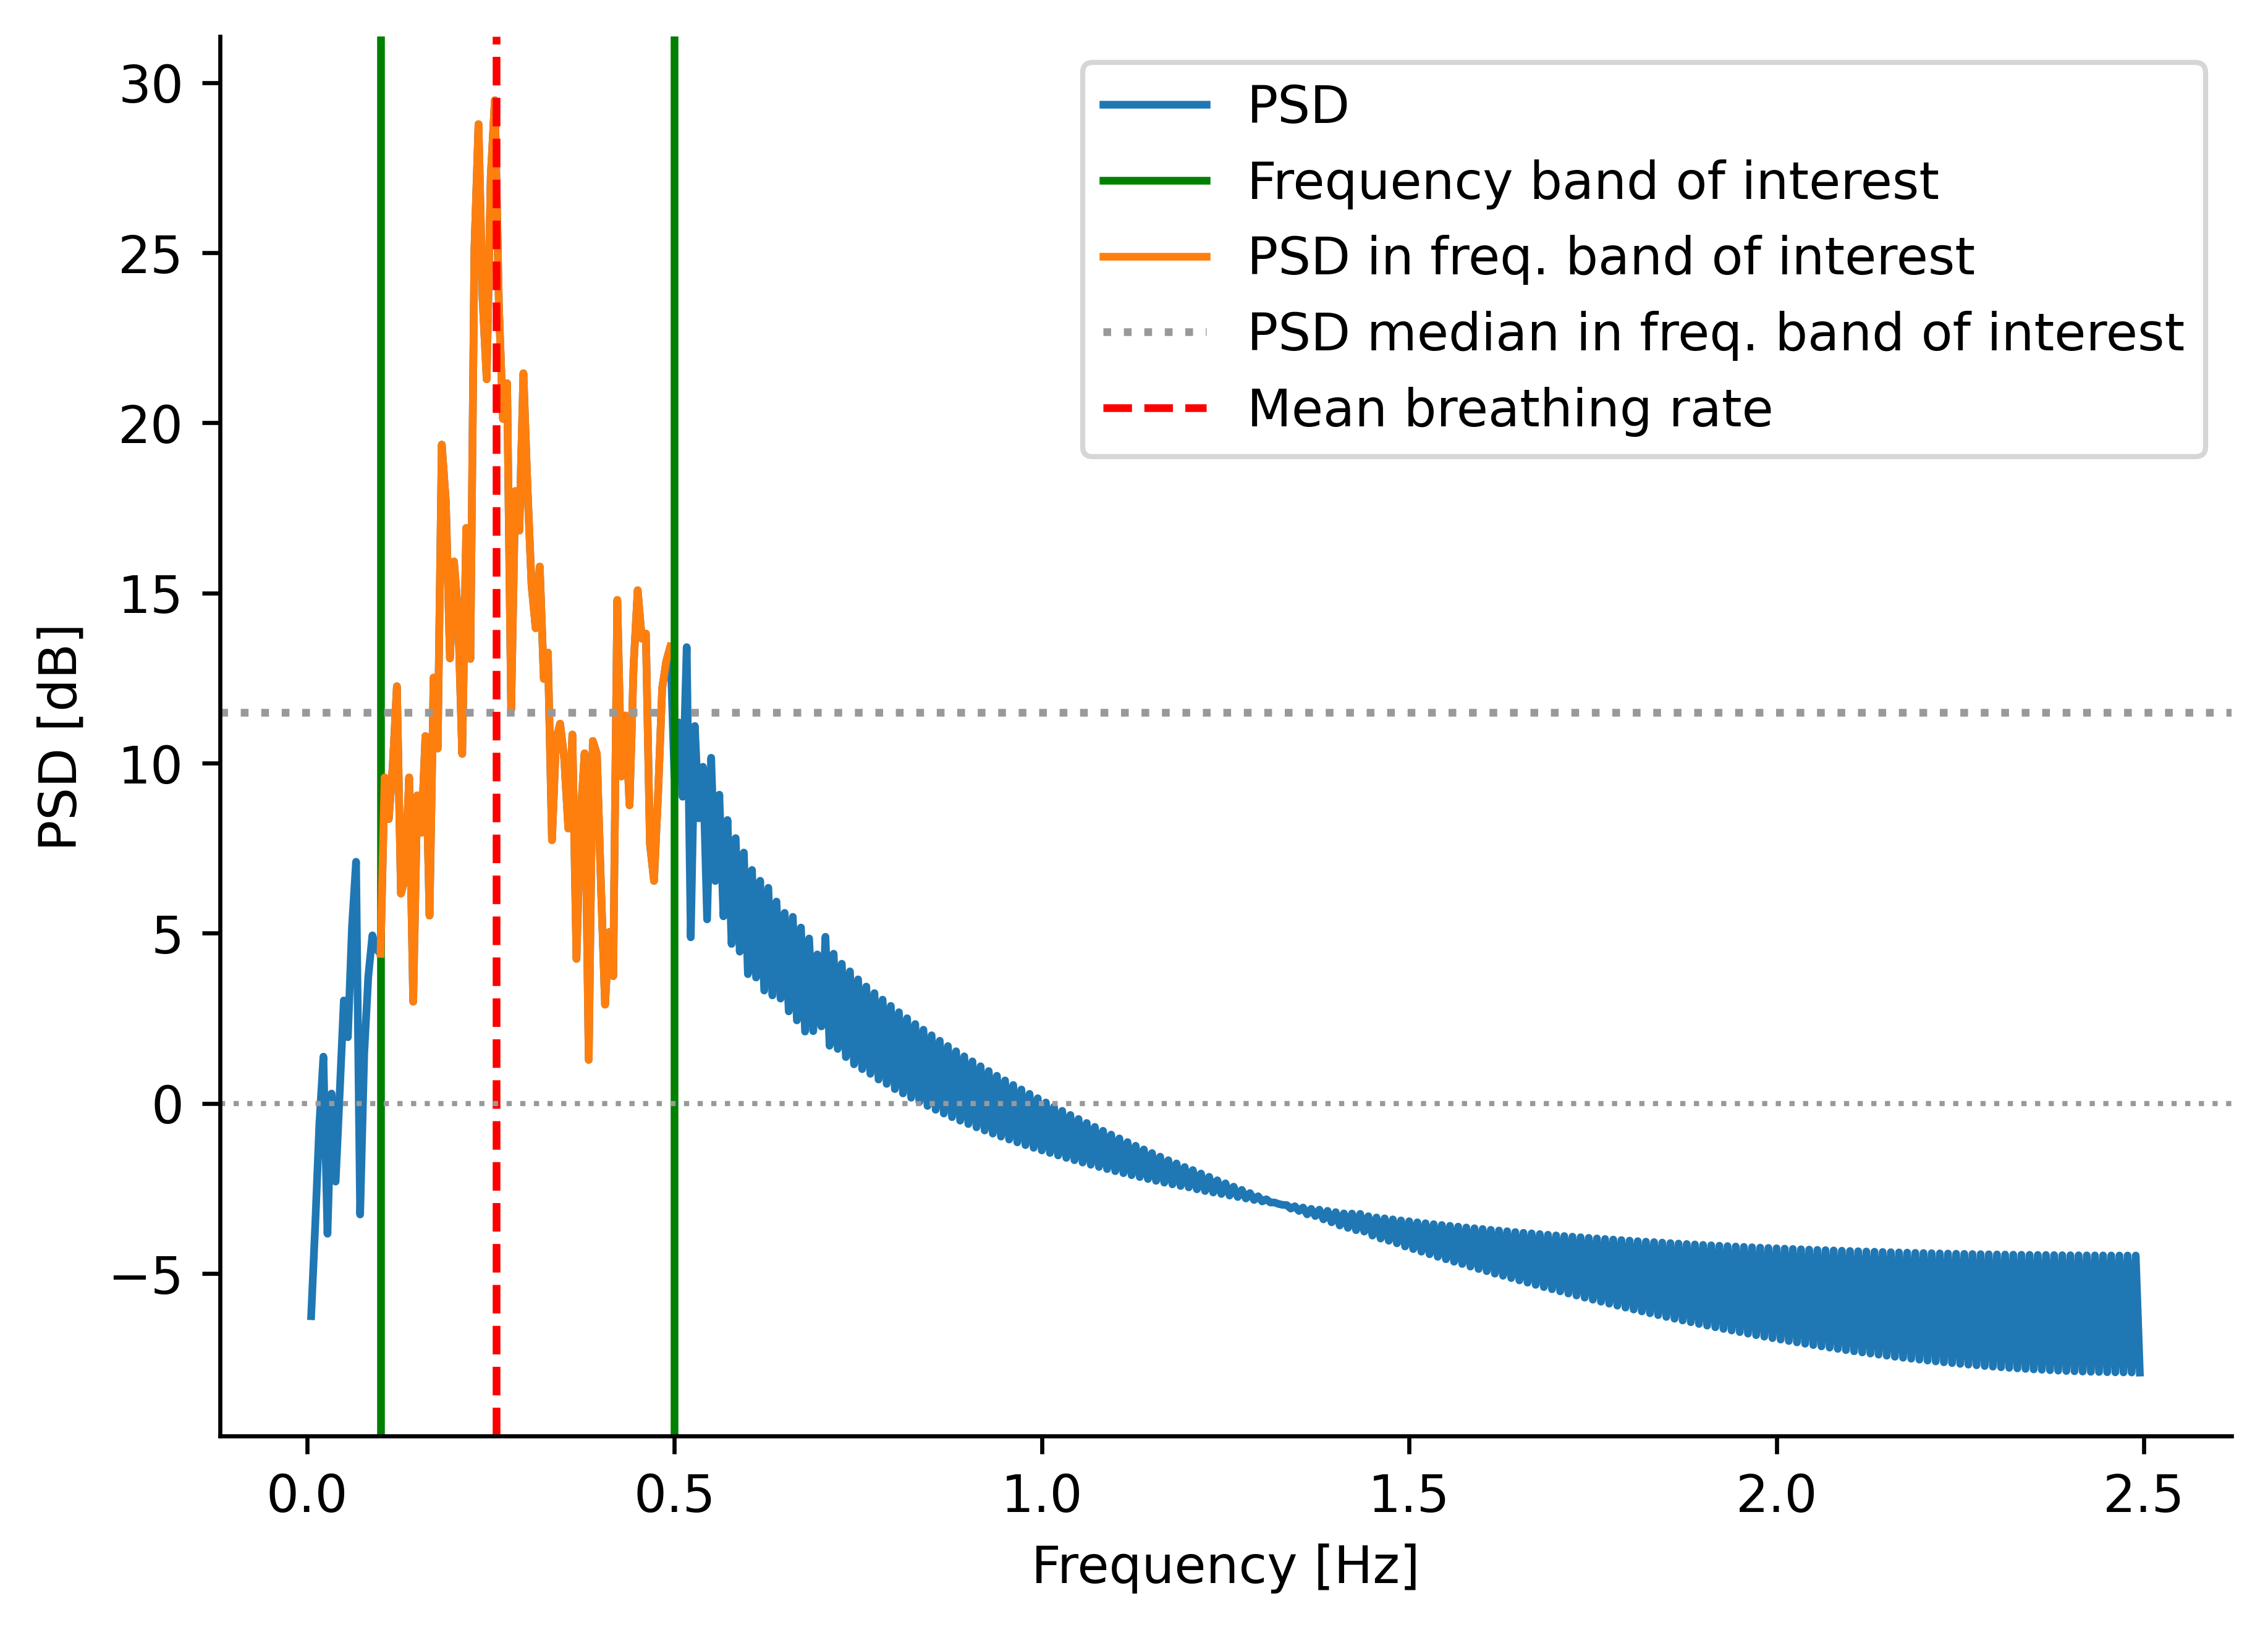

In [8]:
breathing_rate['acf_adv'], fig, ax = br.acf_adv(nn, fs, f_low=0.1, f_high=0.5, visualizations=True)
breathing_rate['acf_adv']

### Counting methods
Both of the counting methods process the signal using a Butterworth 
BPF filter (step 1). For clarity, this is how the filter looks like:

In [9]:
f_low = 0.1 # [Hz]
f_high = 0.5 # [Hz]

b, a = sp.signal.butter(6, [f_low, f_high], btype='bandpass', analog=False, fs=fs)
w, h = sp.signal.freqz(b, a, fs=fs)

nn_filtered = sp.signal.filtfilt(b, a, nn)

For the sake of completion, this is how the filter looks like:

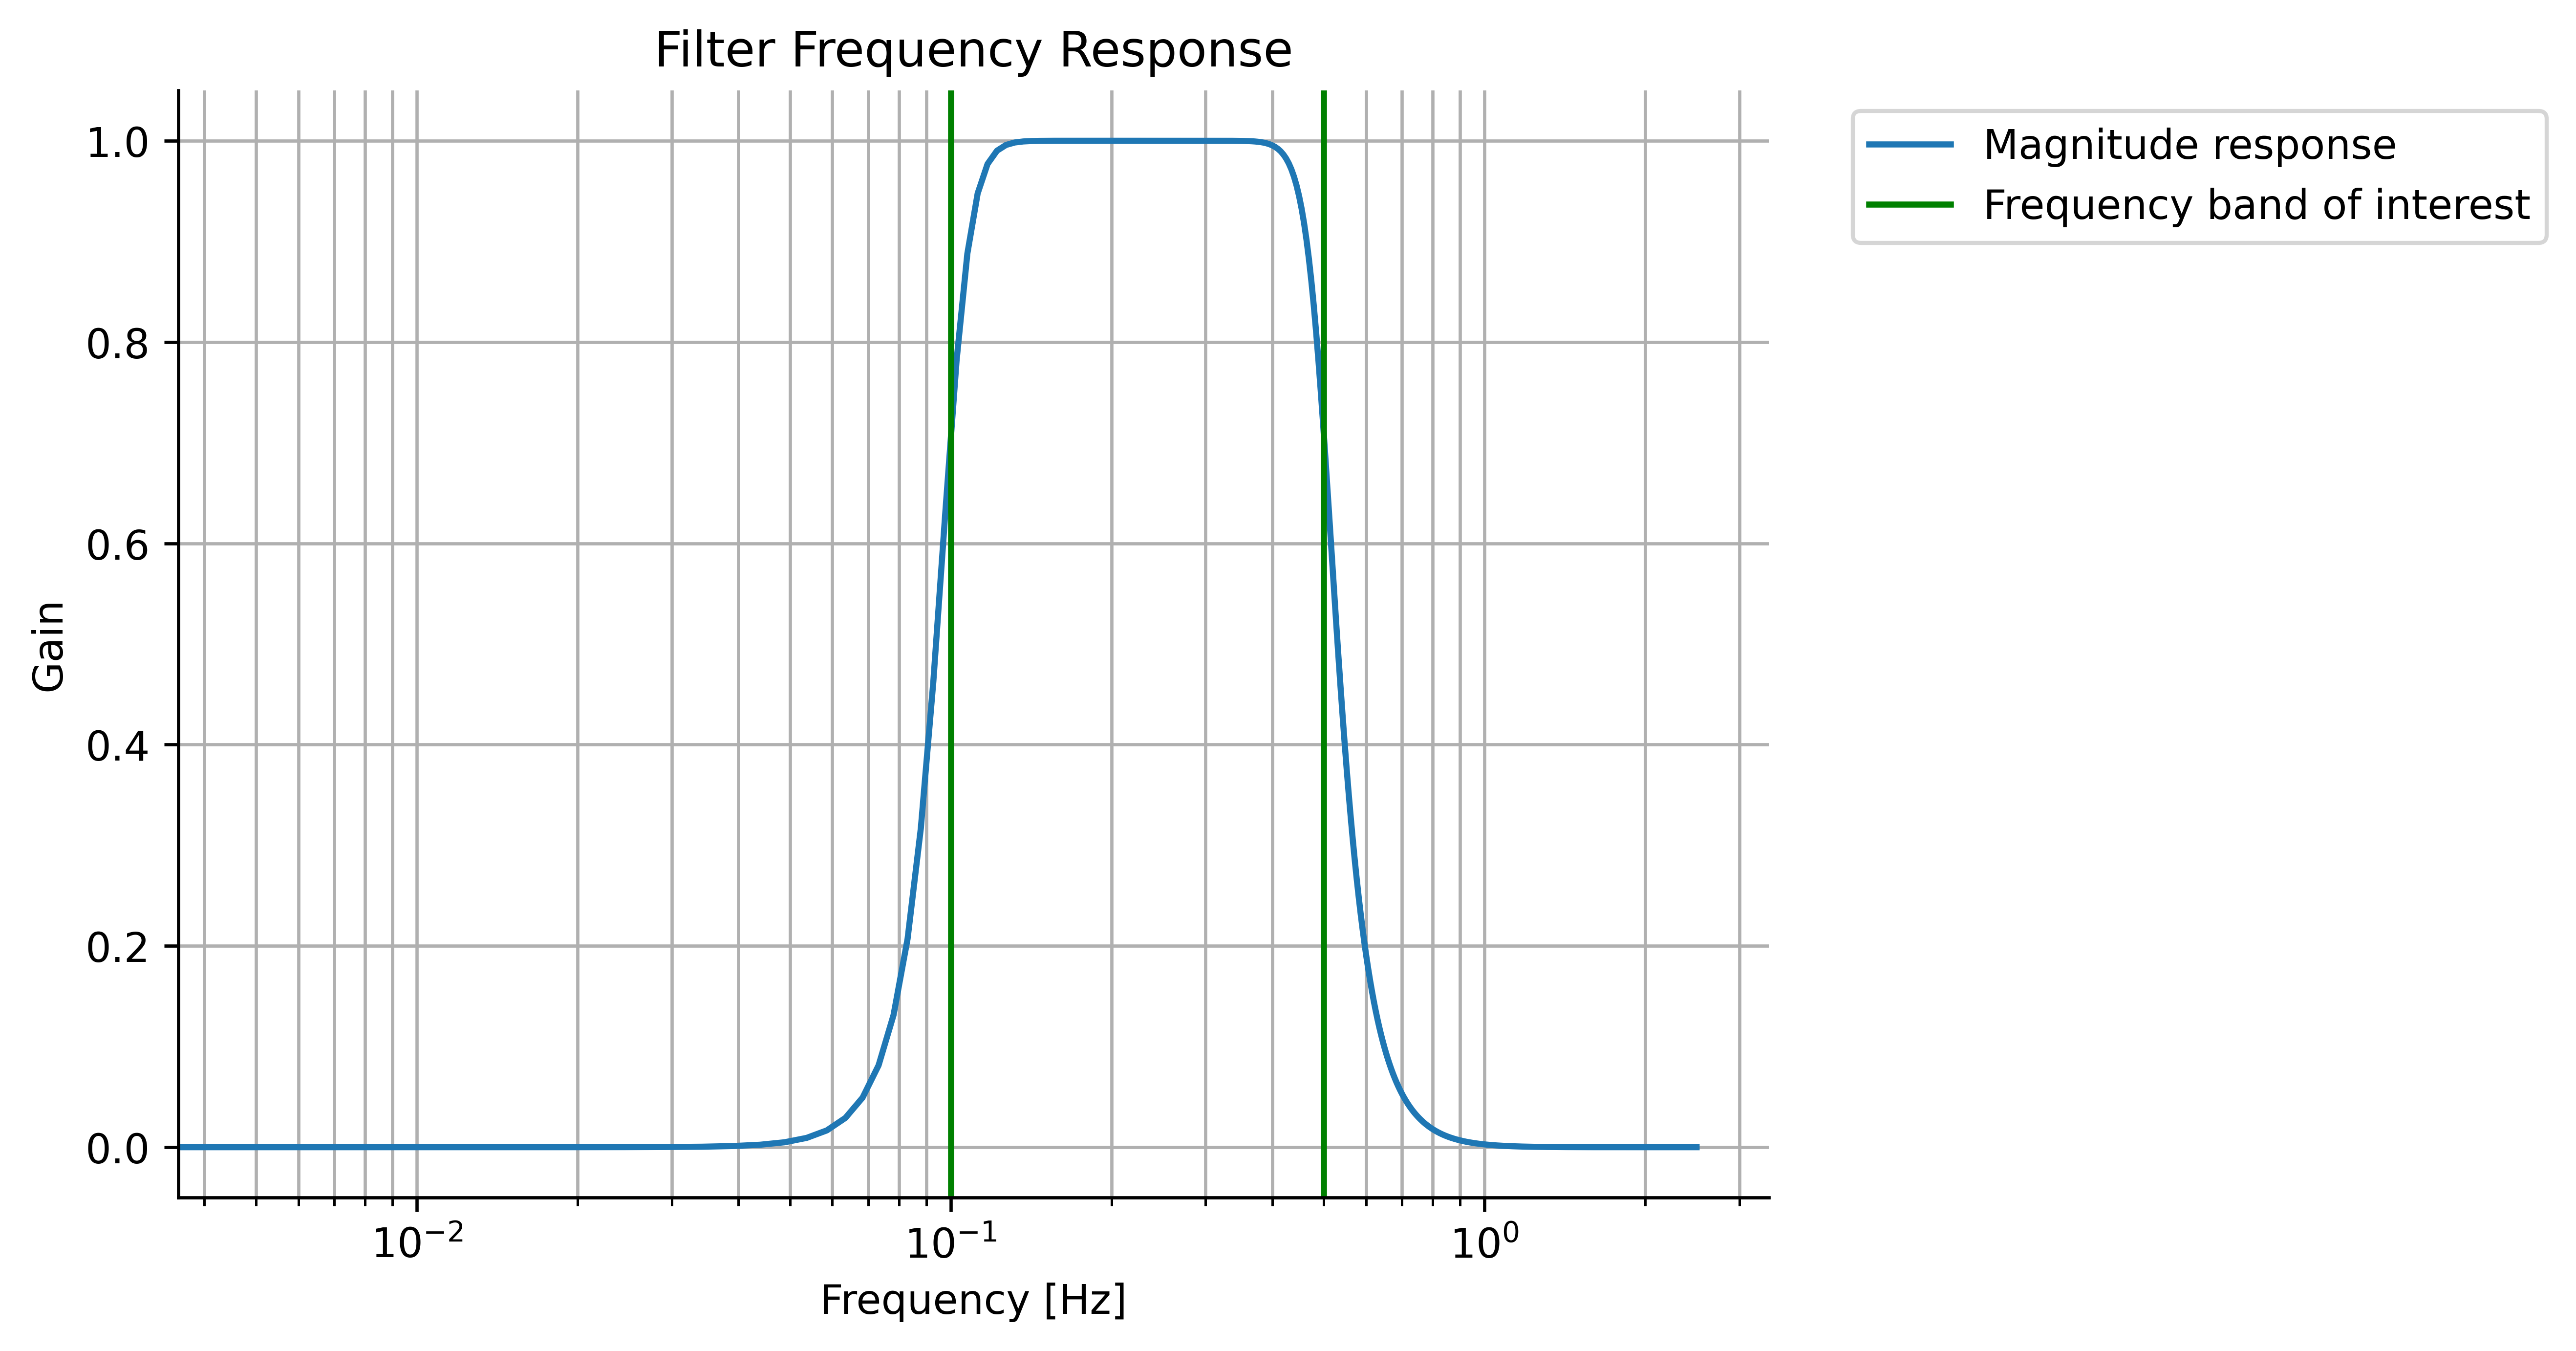

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[7,5])
plt.semilogx(w, abs(h), label="Magnitude response")
plt.grid(which='both', axis='both')
plt.axvline(f_low, color='green', label="Frequency band of interest")
plt.axvline(f_high, color='green')
plt.title('Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    
plt.show()

Notice that the original paper uses a 10th order filter.
However, we use `filtfilt` to filter the signal (to avoid distortion),
which would result in passing the signal through two 5th order filters.
Since we are using a BPF (LPF + HPF), a 5th order would result asymmetrical.
Thus, we opted to use a 12th order filter.

This is how the original and the filtered signal look like.

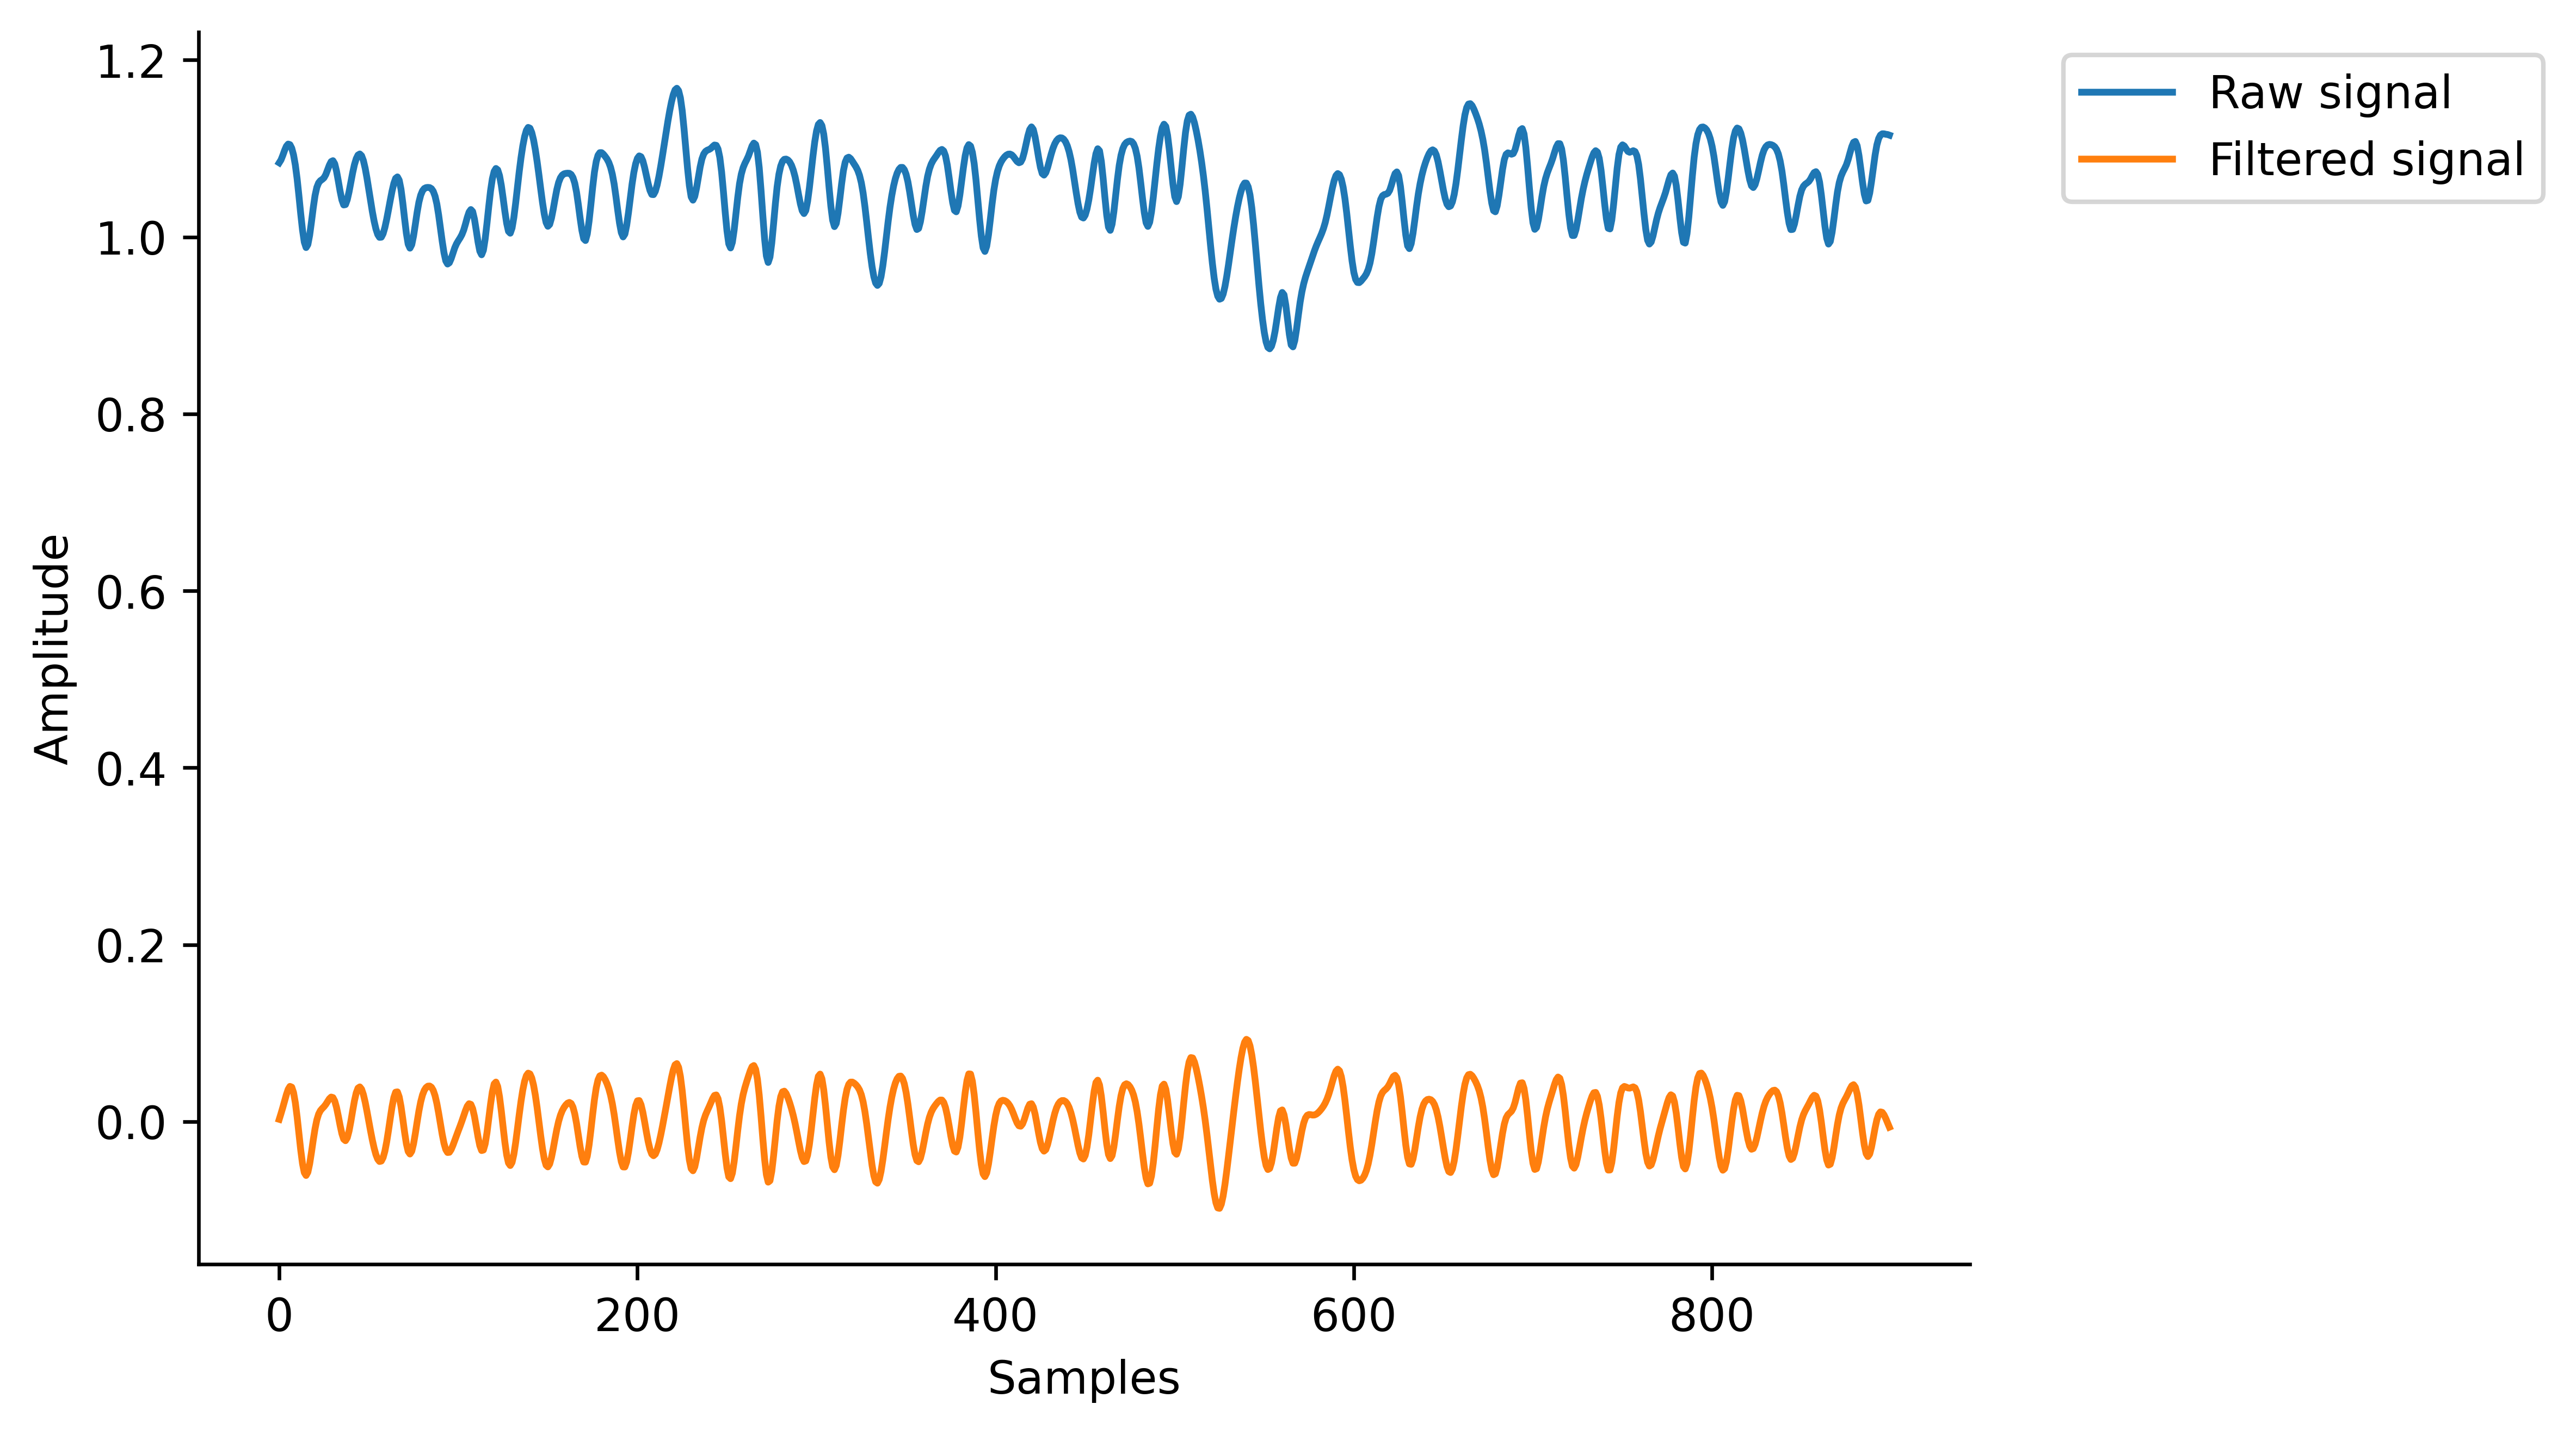

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[7,5])
plt.plot(nn, label="Raw signal")
plt.plot(nn_filtered, label="Filtered signal")
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    
plt.show()

#### Original counting method (`Count-orig`)

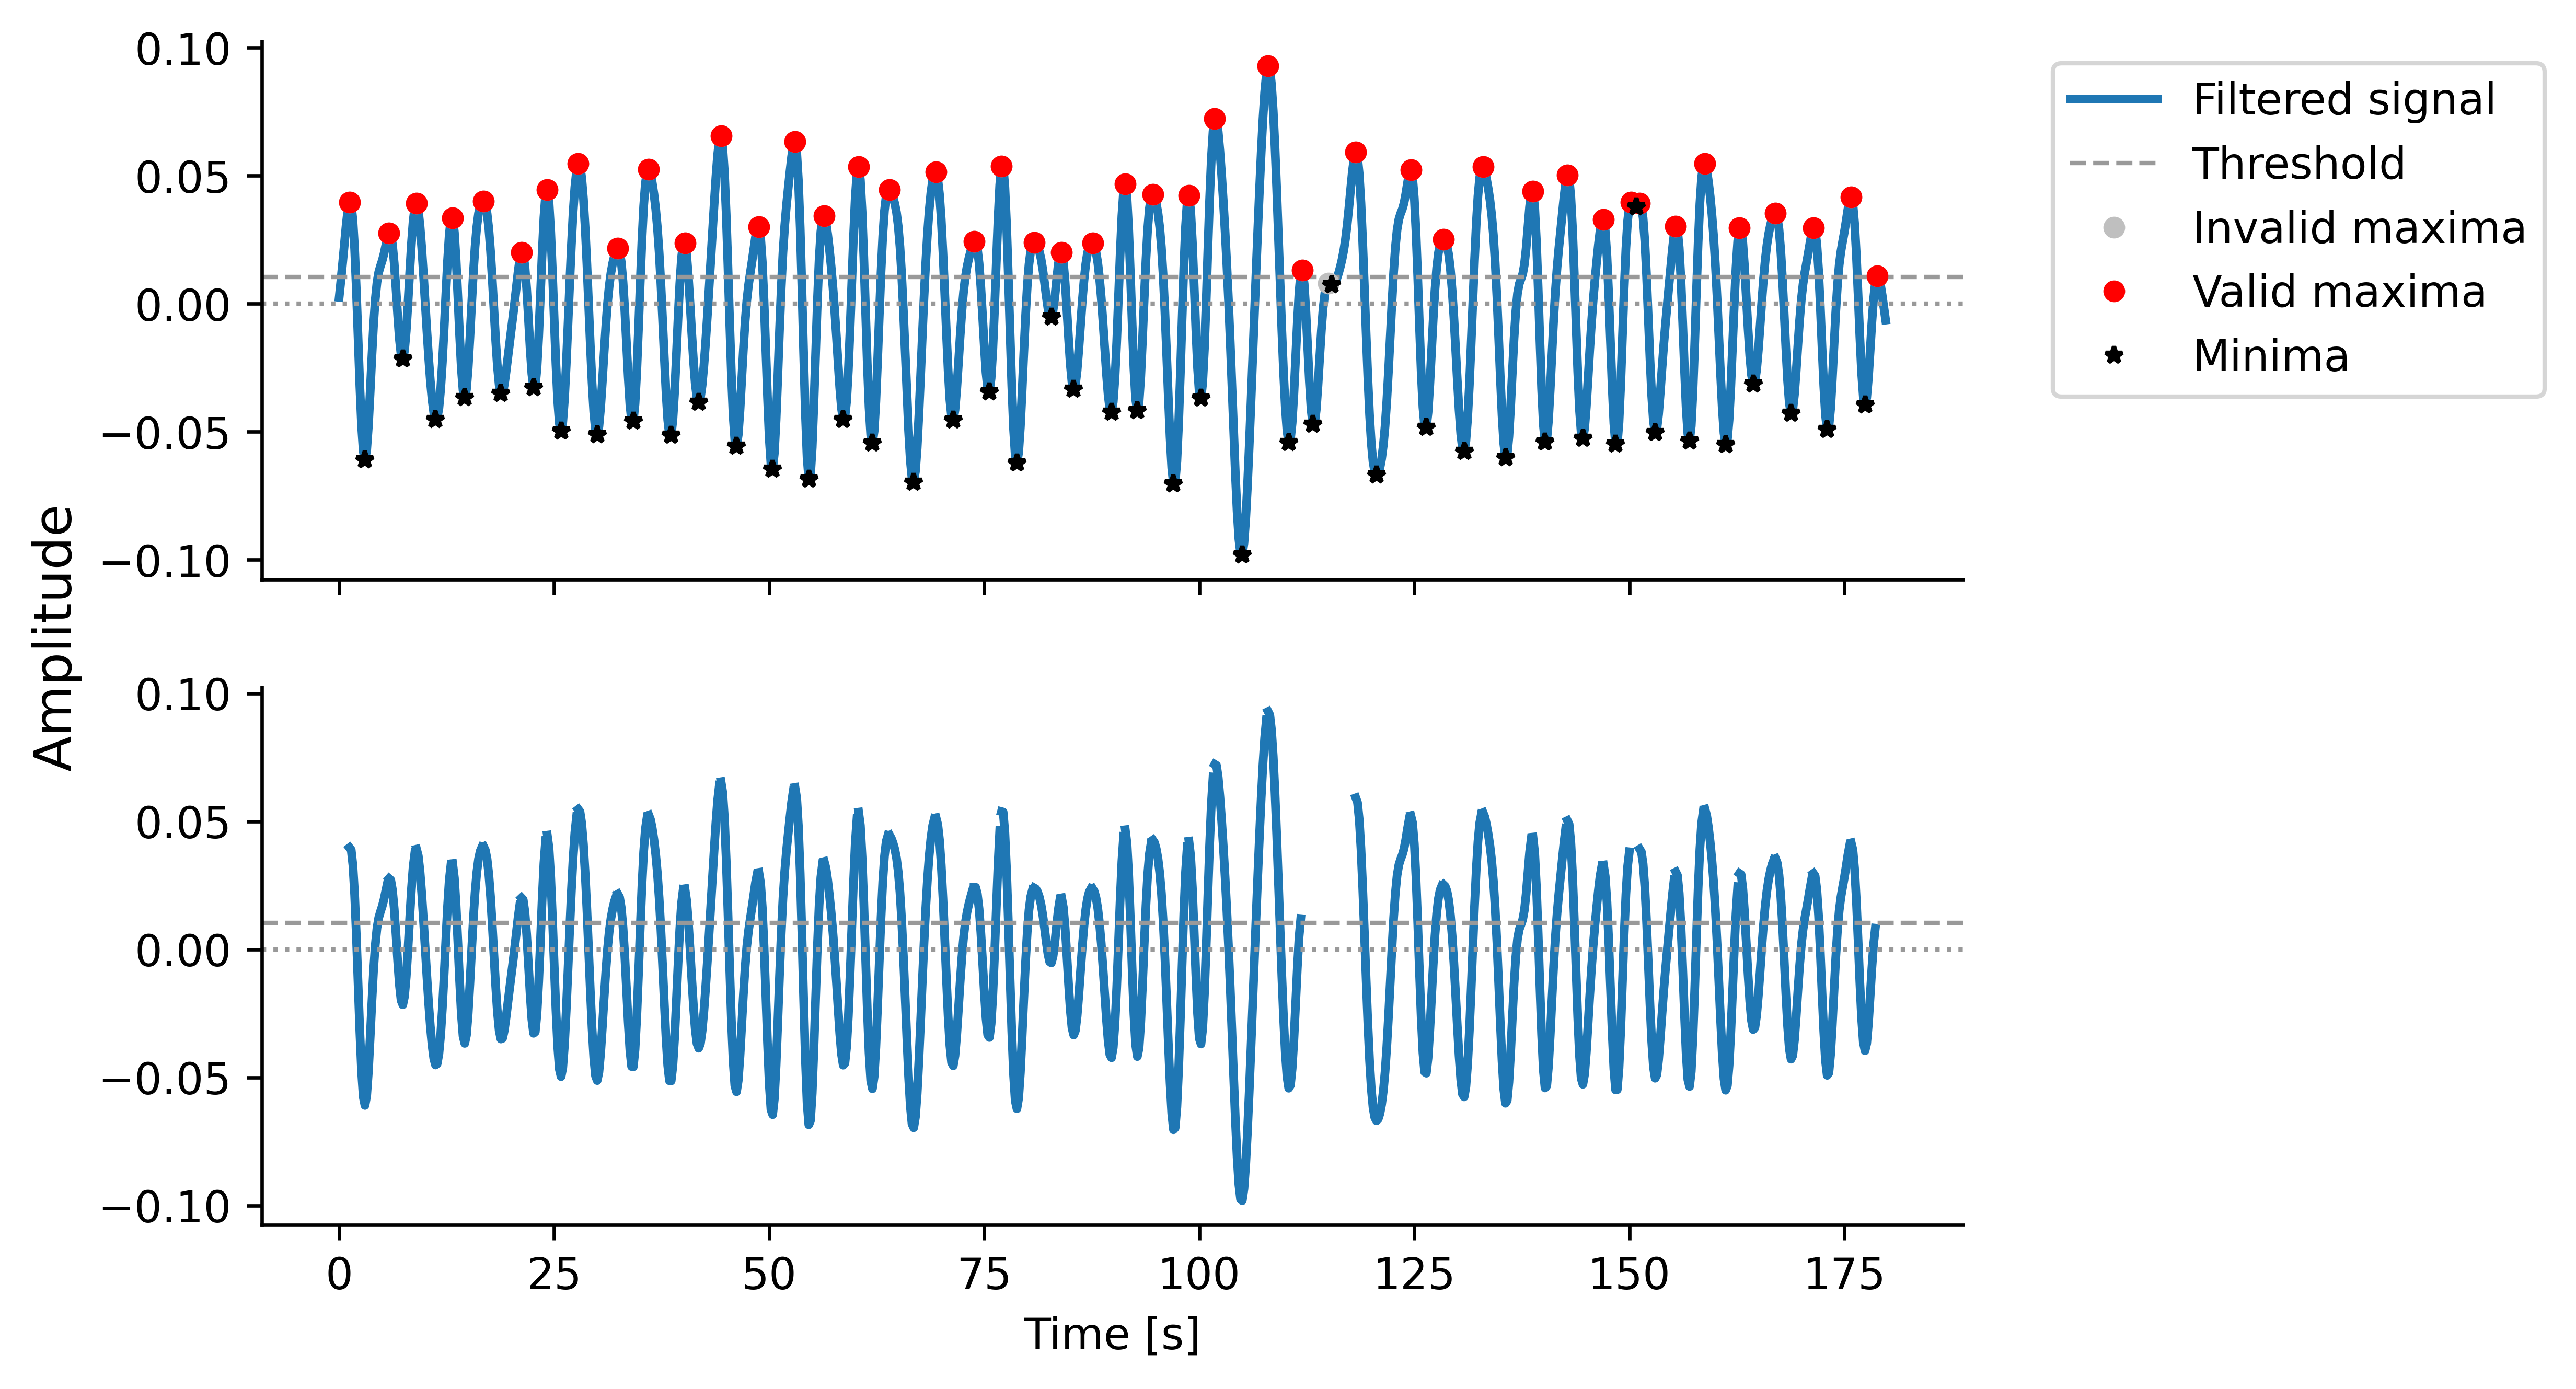

0.24647887323943662

In [12]:
breathing_rate['count_orig'], fig, ax = br.count_orig(nn, fs, f_low=0.1, f_high=0.5, visualizations=True)
breathing_rate['count_orig']

#### Advanced counting method (`Count-adv`)

d:\users\artur\documents\projects\breathing-rate-rsa\src\signals\breathing_rate.py:611: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_min = np.hstack(itertools.zip_longest(maxima, minima, fillvalue=np.nan))


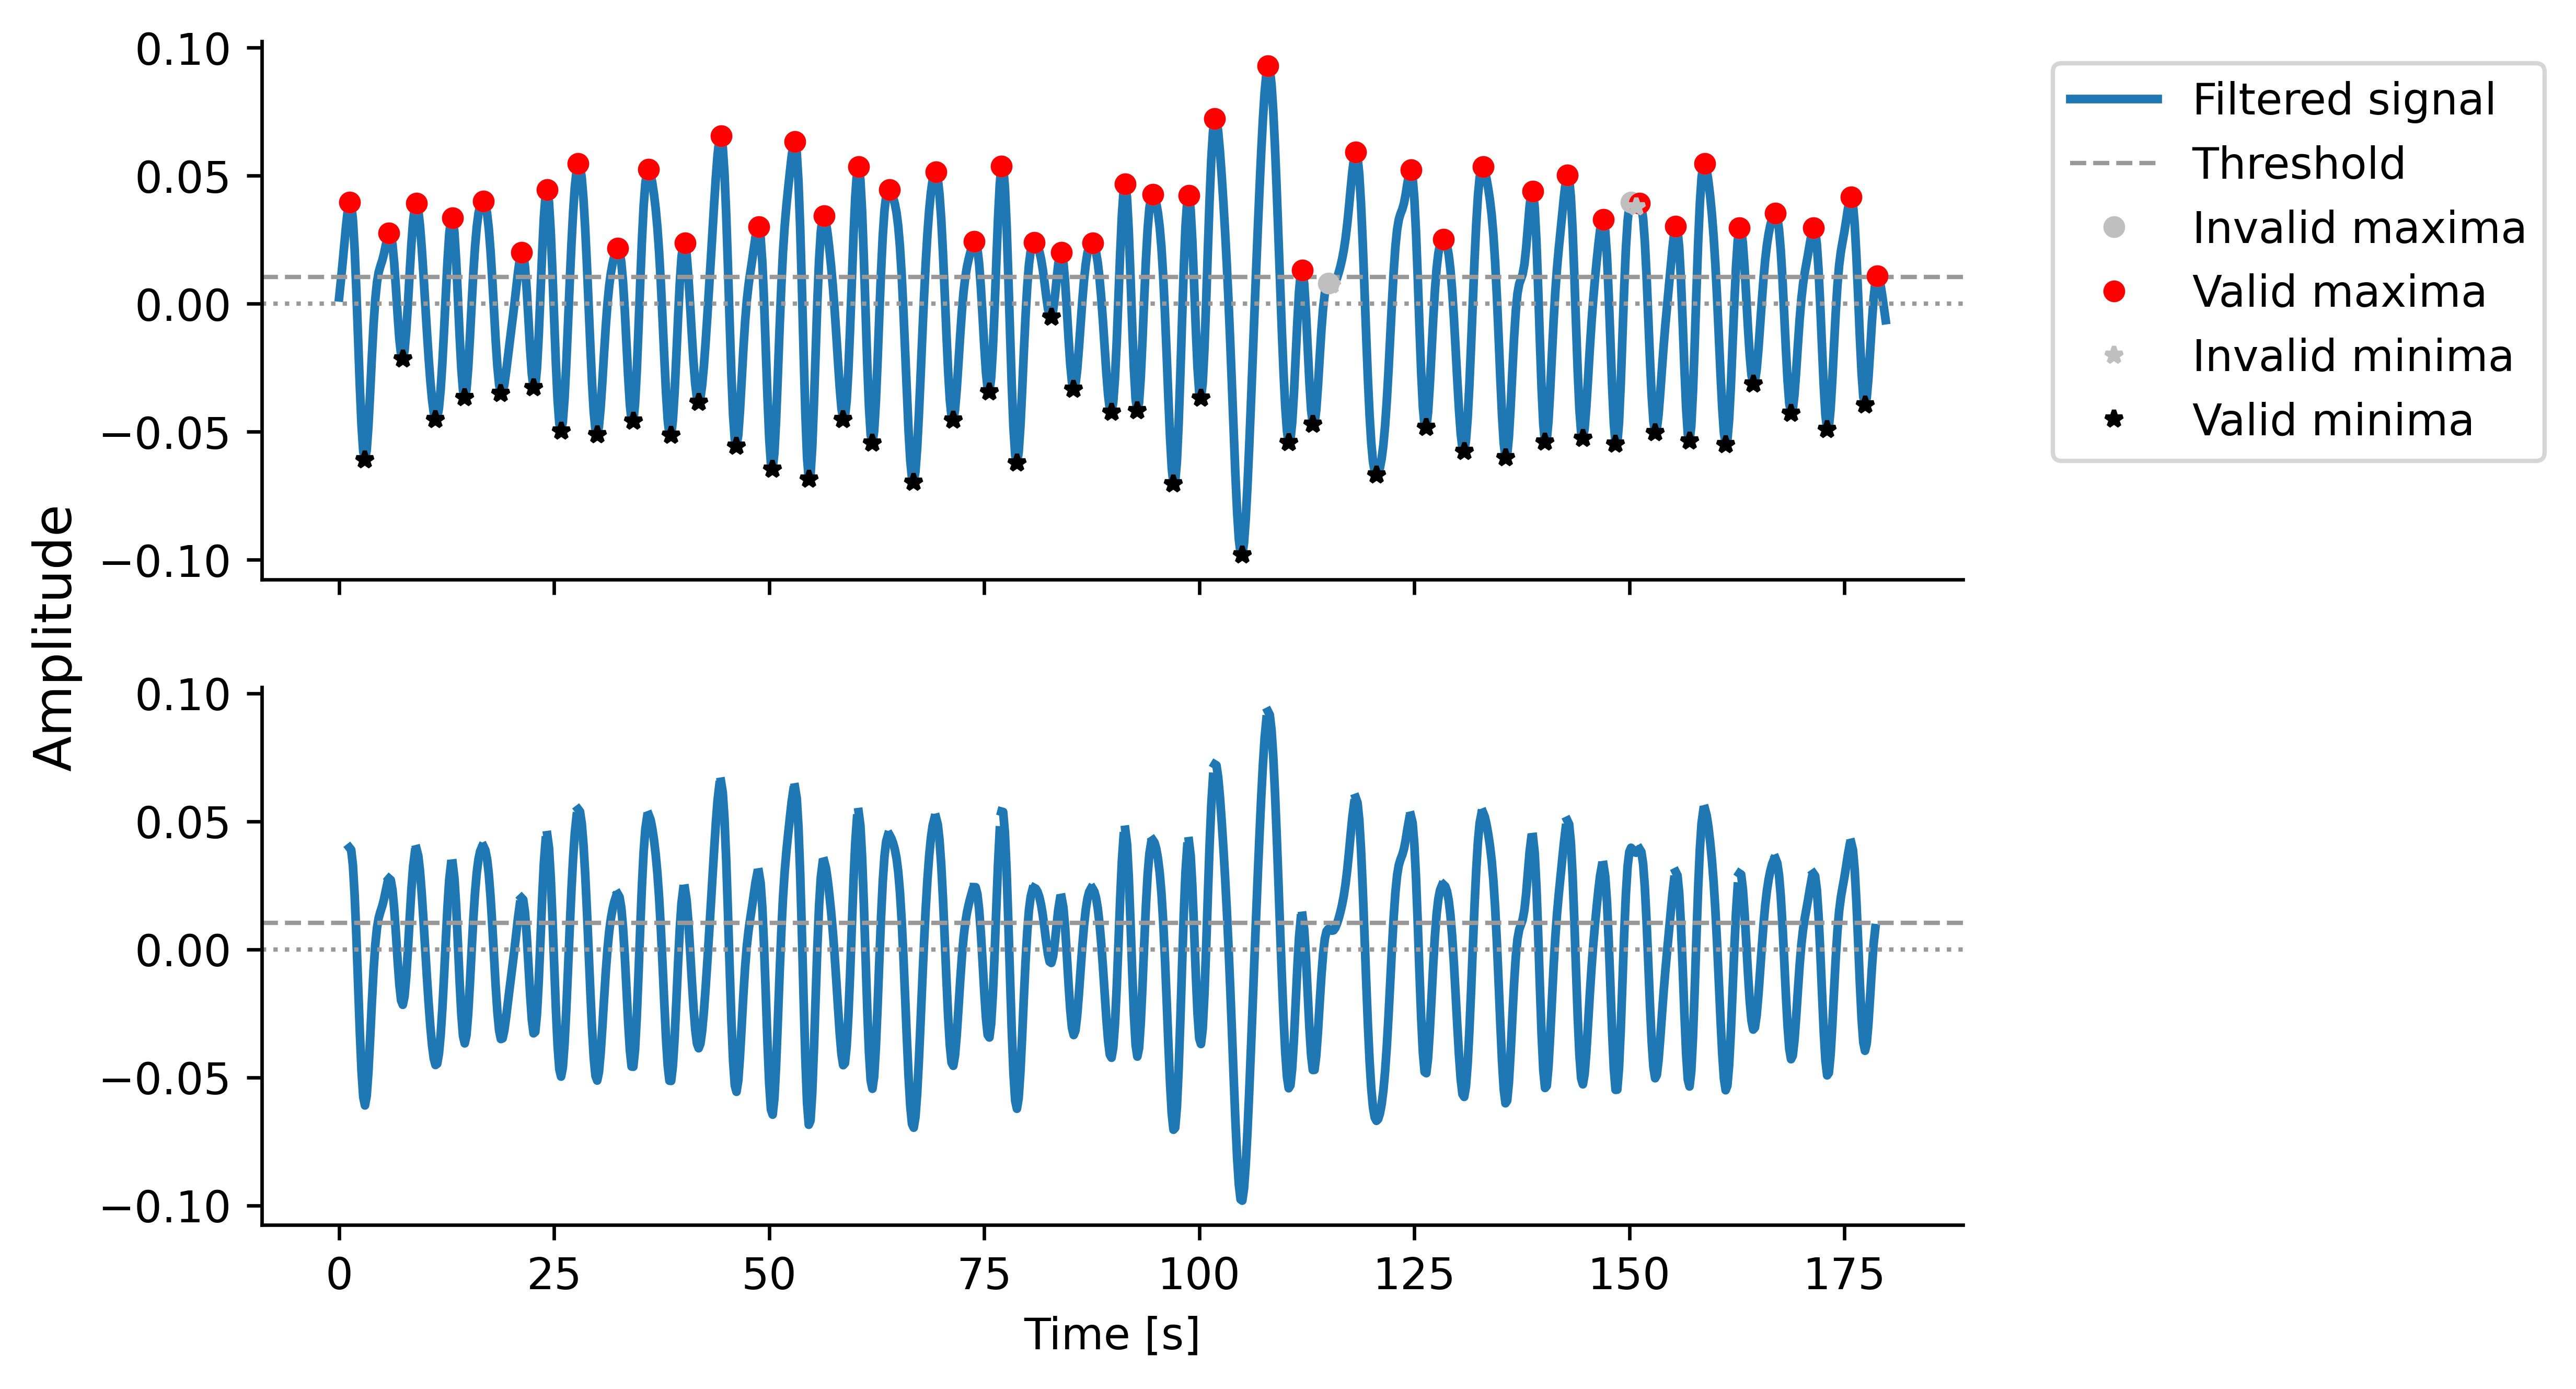

0.24211711711711711

In [13]:
breathing_rate['count_adv'], fig, ax = br.count_adv(nn, fs, f_low=0.1, f_high=0.5, signal_type='nn', visualizations=True)
breathing_rate['count_adv']